In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.model_selection import learning_curve

# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values



loo = LeaveOneOut()
loo_scores = [] 

## Splitting & Using SVM


## Using Evaluation Metrics

Leave-One-Out CV Accuracy: 99.85888993414864 %
Precision (macro) = 0.9984636366623945
Recall (macro) = 0.9975387031252666
F1-score (macro) = 0.9980001835728926
*******************


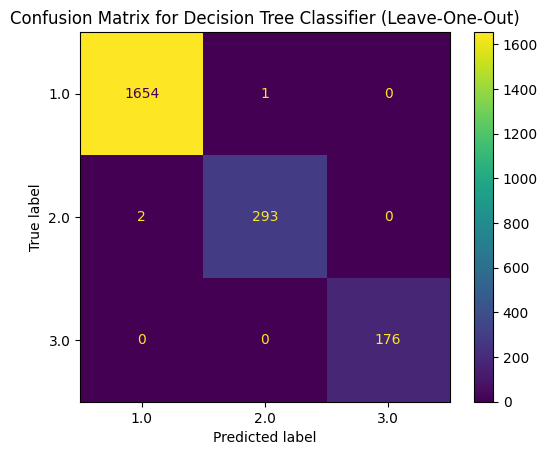

Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1655
         2.0       1.00      0.99      0.99       295
         3.0       1.00      1.00      1.00       176

    accuracy                           1.00      2126
   macro avg       1.00      1.00      1.00      2126
weighted avg       1.00      1.00      1.00      2126



In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, y_train)

    y_pred = decision_tree.predict(X_test)
    loo_scores.append(y_pred[0] == y_test[0])

# Print accuracy
accuracy = accuracy_score(y, decision_tree.predict(X))

precision = precision_score(y, decision_tree.predict(X), average='macro')
recall = recall_score(y, decision_tree.predict(X), average='macro')
f1 = f1_score(y, decision_tree.predict(X), average='macro')
print("Leave-One-Out CV Accuracy:", accuracy * 100, "%")

print("Precision (macro) =", precision)
print("Recall (macro) =", recall)
print("F1-score (macro) =", f1)

print("*******************")

conf_matrix = confusion_matrix(y, decision_tree.predict(X))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for Decision Tree Classifier (Leave-One-Out)')
plt.show()

class_report = classification_report(y, decision_tree.predict(X))
print("Classification Report:")
print(class_report)


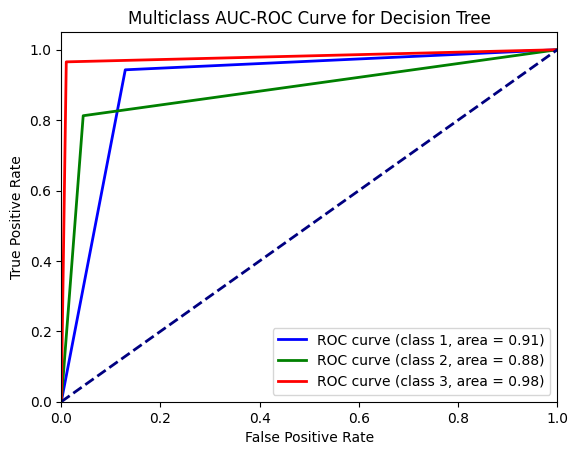

In [6]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

y_test_binarized = label_binarize(y_test, classes=np.unique(y))

y_scores = decision_tree_model.predict_proba(X_test)

n_classes = len(np.unique(y))

plt.figure()

colors = ['b', 'g', 'r']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'ROC curve (class {i+1}, area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass AUC-ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()


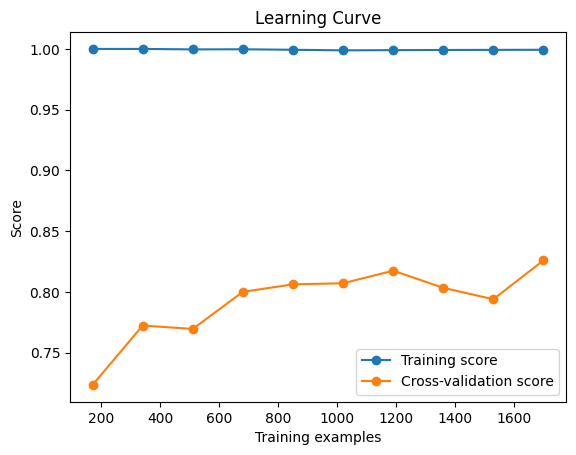

In [7]:
train_sizes, train_scores, test_scores = learning_curve(decision_tree, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

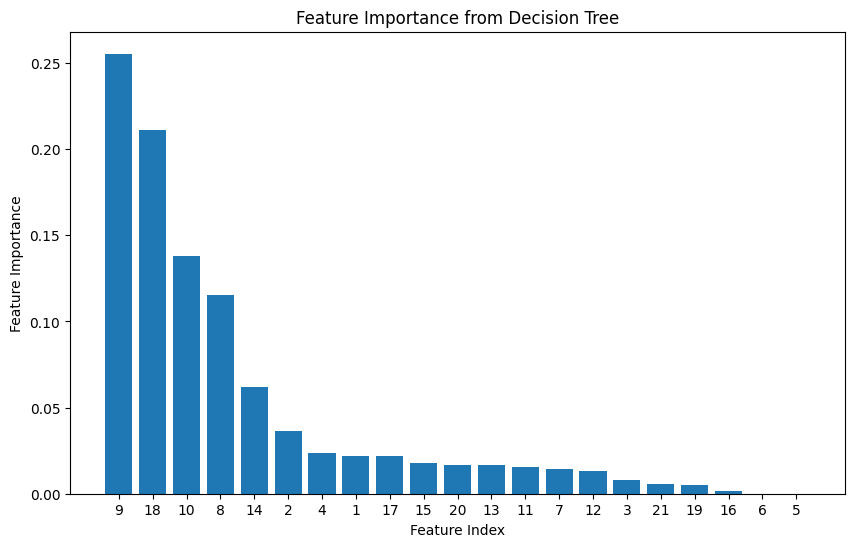

In [8]:
# Get feature importances
feature_importances = decision_tree.feature_importances_

# Get the indices of features sorted by importance
sorted_feature_indices = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_feature_indices])
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance from Decision Tree')
plt.xticks(range(X.shape[1]), sorted_feature_indices + 1)  # Adding 1 to make indices start from 1
plt.show()

## Checking class distribution

Class Distribution:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64
Coefficient of Variation (CV): 1.1595095195631708


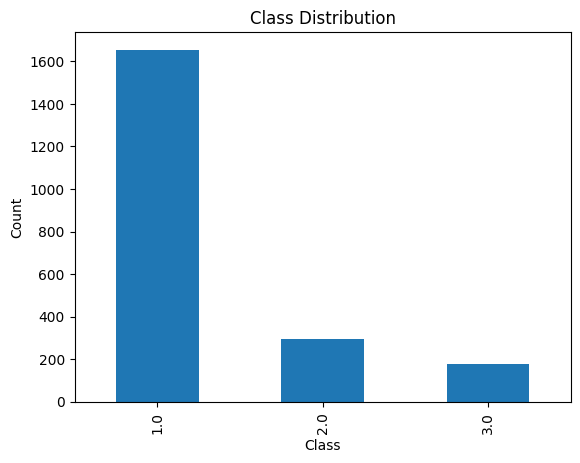

In [9]:

target_column = 'fetal_health'

class_distribution = df[target_column].value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Applying SMOTE


In [10]:
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_normalized, y_train)

# y_resampled_int = y_resampled.astype(int)



Class Distribution:
1.0    1322
2.0    1322
3.0    1322
Name: count, dtype: int64
Coefficient of Variation (CV): 0.0


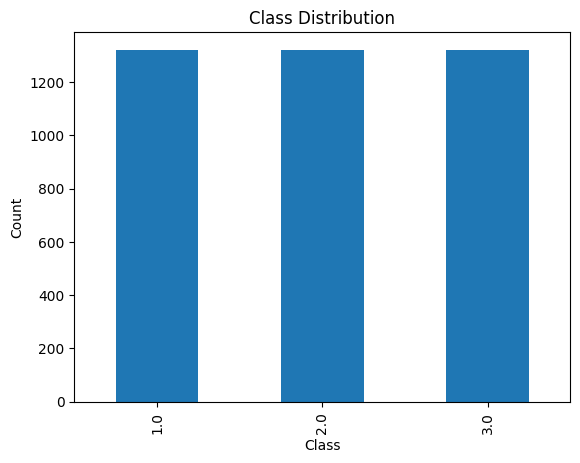

In [11]:


y_resampled_series = pd.Series(y_resampled)

class_distribution = y_resampled_series.value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Using SVM

In [12]:


from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.model_selection import cross_val_score, KFold

# y_pred_res = knn_after_smote.predict(X_test)
DT_after_smote =  DecisionTreeClassifier()
DT_after_smote.fit(X_resampled, y_resampled)

# cv = LeaveOneOut()
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
k_folds = 5  # You can change this to the desired number of folds

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform K-Fold Cross-Validation
# cross_val_results = cross_val_score(gradient_boosting, X, y, cv=kf)

y_pred_res = cross_val_predict(DT_after_smote, X_resampled, y_resampled, cv=kf)


## Using Evaluation Metrics

Accuracy: 95.05799293998992 %
Precision (macro) = 1.0
Recall (macro) = 1.0
F1-score (macro) = 1.0


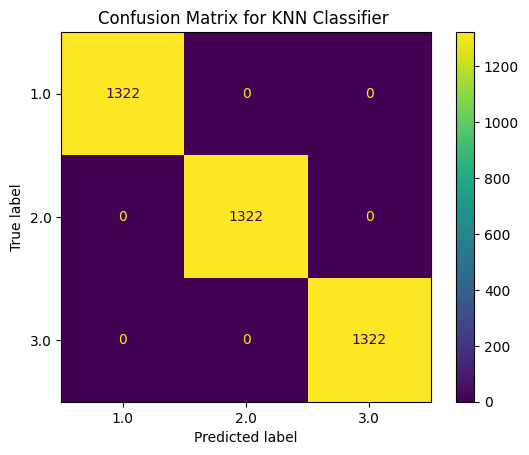

Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1322
         2.0       1.00      1.00      1.00      1322
         3.0       1.00      1.00      1.00      1322

    accuracy                           1.00      3966
   macro avg       1.00      1.00      1.00      3966
weighted avg       1.00      1.00      1.00      3966



In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

accuracy = accuracy_score(y_resampled, y_pred_res)
print("Accuracy:", accuracy * 100, "%")

precision = precision_score(y_resampled, DT_after_smote.predict(X_resampled), average='macro')
recall = recall_score(y_resampled, DT_after_smote.predict(X_resampled), average='macro')
f1 = f1_score(y_resampled, DT_after_smote.predict(X_resampled), average='macro')
print("Precision (macro) =", precision)
print("Recall (macro) =", recall)
print("F1-score (macro) =", f1)


conf_matrix = confusion_matrix(y_resampled, DT_after_smote.predict(X_resampled))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for KNN Classifier ')
plt.show()
class_report = classification_report(y_resampled, DT_after_smote.predict(X_resampled))
print("Classification Report:")
print(class_report)



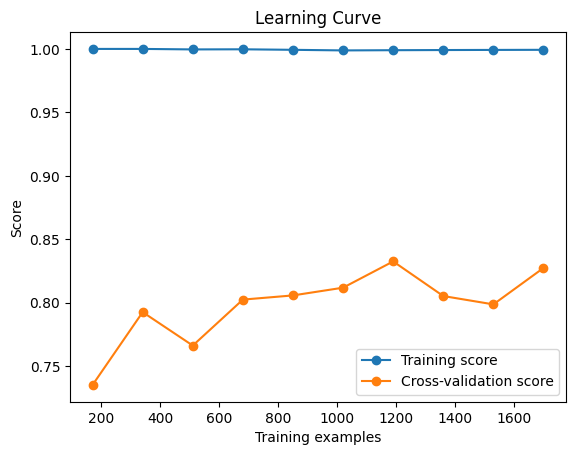

In [14]:
train_sizes, train_scores, test_scores = learning_curve(DT_after_smote, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

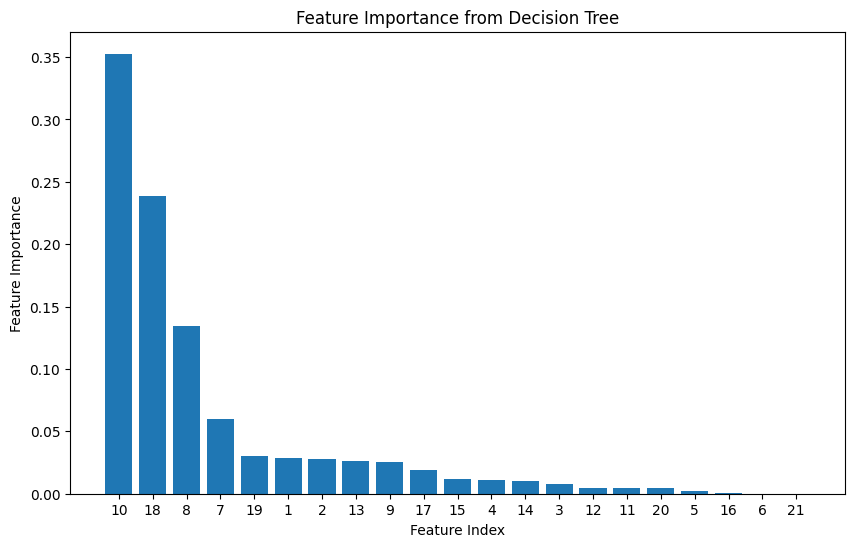

In [15]:
feature_importances = DT_after_smote.feature_importances_

sorted_feature_indices = feature_importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_feature_indices])
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance from Decision Tree')
plt.xticks(range(X.shape[1]), sorted_feature_indices + 1)  # Adding 1 to make indices start from 1
plt.show()

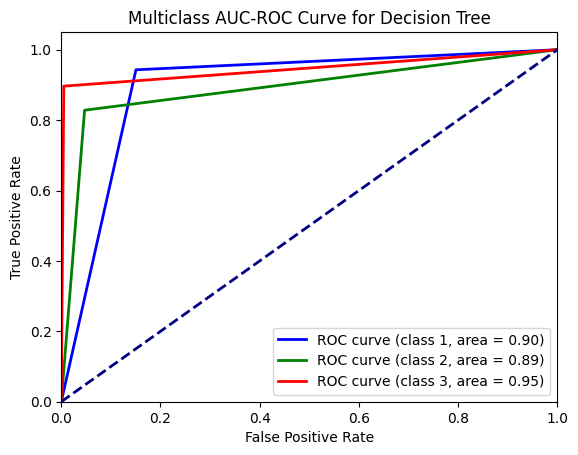

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

y_test_binarized = label_binarize(y_test, classes=np.unique(y))

y_scores = decision_tree_model.predict_proba(X_test)

n_classes = len(np.unique(y))

plt.figure()

colors = ['b', 'g', 'r']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'ROC curve (class {i+1}, area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass AUC-ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()
